<h1><center><font size="6">CardGuardian : Credit Card Fraud Detection Predictive Models</font></center></h1>

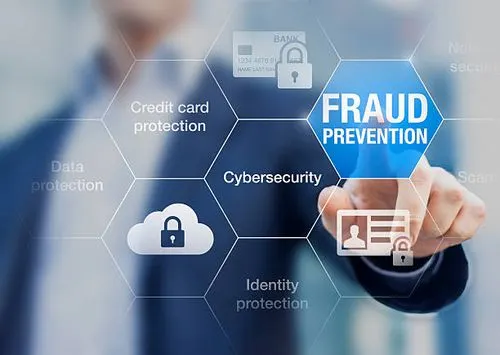

# Introduction

 [Dataset ](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download)

The widespread and increasing global use of credit cards necessitates that companies prioritize the security and safety of their customers. Approximately 2.8 billion people worldwide used credit cards in 2019. Reports of credit card fraud in the U.S. surged by 44.7% in 2020. Credit card fraud occurs when unauthorized individuals use credit cards or their information to gain money or property fraudulently. Sensitive information can be stolen via unsecured online platforms or identity theft schemes. There are two primary types of credit card fraud: opening a new account in someone else's name (48% increase in reports in 2020) and using an existing account by stealing information (9% increase in reports in 2020). Fraudulent activities associated with credit and debit cards are major causes of financial losses in the finance industry. For instance, credit and debit card fraud cases reported in the U.K. were worth £574.2 million in 2020. These escalating statistics highlight the urgent need for analytical methods to address credit card fraud. Machine learning is effective in determining which transactions are fraudulent and which are legitimate. This project aims to address this issue by applying and comparing different machine learning methods to detect fraudulent transactions.


# Import Necessary libraries 


In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')



# Reading the Data 

In [9]:
data_df = pd.read_csv("creditcard.xls")

# EDA

In [5]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


## Exploring the Data 

We start by looking to the data features (first 5 rows).

In [6]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Here are the details about the dataset:

**Origin:** It contains data on transactions made by European credit card users.

**Timeframe:** The data covers transactions made in 2013 over a period of only two days.

**Size:** The dataset consists of 284,808 rows (representing transactions).

**Attributes:** It has 31 attributes.
- Twenty-eight (V1-V28) of these attributes are numeric variables that have been transformed using PCA transformation due to confidentiality and privacy concerns.

- The remaining three attributes are "Time", "Amount", and "Class".

- "Time" represents the elapsed seconds between the first transaction and other transactions.

- "Amount" is the amount of each transaction.

- "Class" is a binary variable indicating whether a transaction is fraudulent ('1') or not fraudulent ('0').

In [7]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Based on the Time feature, the dataset comprises 284,807 transactions recorded over a span of two consecutive days (or 172,792 seconds).*

## Missing data analysis 

Let's check if there are any missing data.

In [8]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*There is no missing data in the entire dataset.*

## Imbalance in Data

 Let's examine the class distribution to check for data imbalance with respect to the **target** variable, i.e., **Class**.


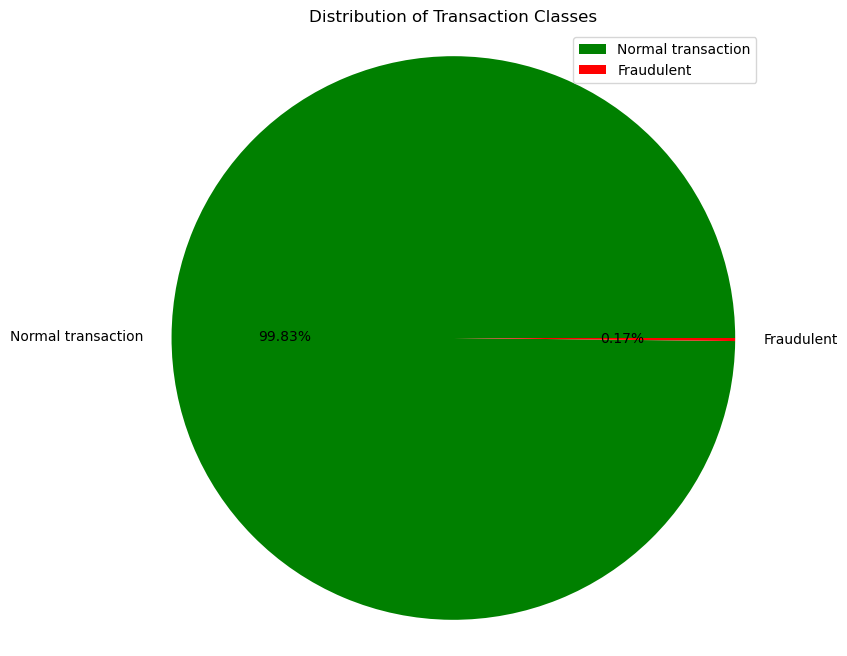

In [11]:


plt.figure(figsize=(8,8))
plt.pie(
    data_df['Class'].value_counts(), 
    labels=['Normal transaction', 'Fraudulent'], 
    colors=['green', 'red'],
    autopct='%1.2f%%'  # shows percentage on the chart
)
plt.title('Distribution of Transaction Classes')
plt.legend(loc='upper right')
plt.axis('equal')  # ensures the pie is a perfect circle
plt.show()

*Out of all transactions, only 492 (or about 0.172%) are fraudulent, highlighting a significant imbalance in the target variable Class.*

# Feature pattern analysis 

## Transactions in time

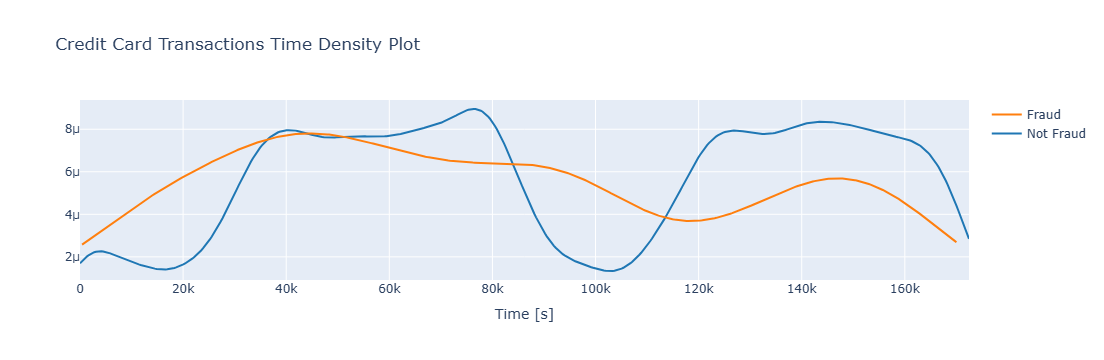

In [9]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

*Fraudulent transactions are more evenly distributed over time compared to valid ones — they occur consistently throughout the day, including during periods of low legitimate activity, such as nighttime in the European time zone.*

##### Let's delve deeper into the time distribution of transactions for both classes, along with the aggregated transaction count and amount per hour. Based on the observed time patterns, we assume that the time unit is in seconds.

In [12]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


### Lets see how the difference in distribution can be observed based on a few features 

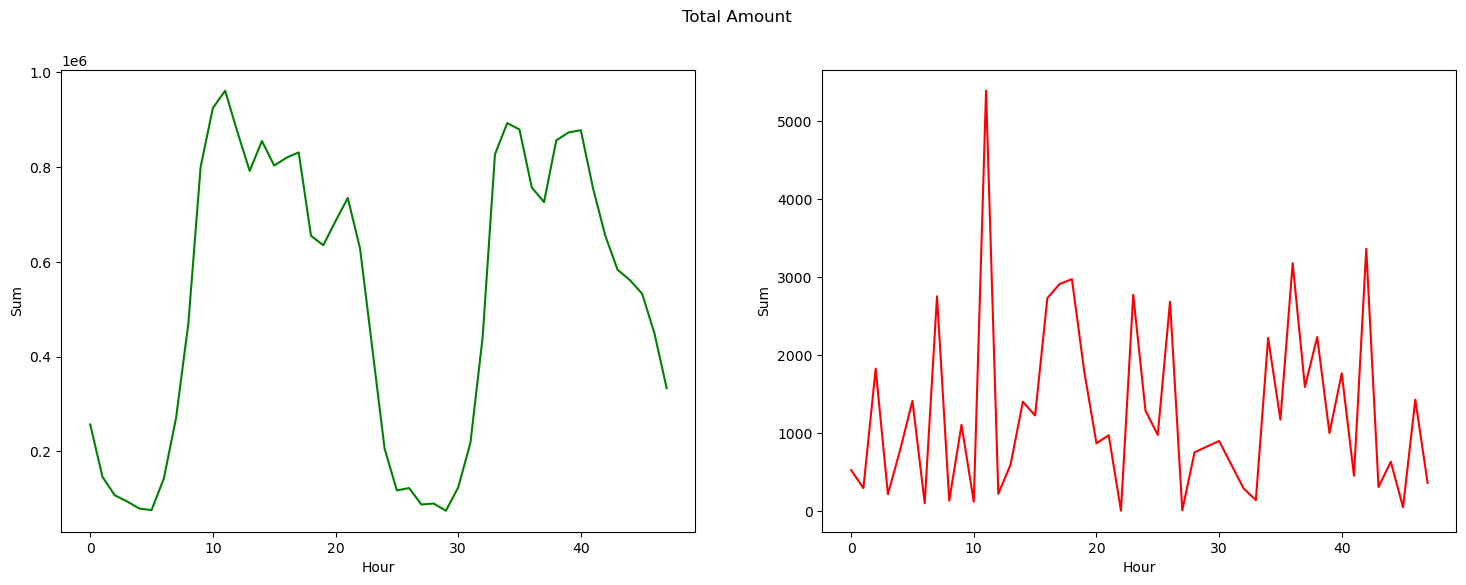

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

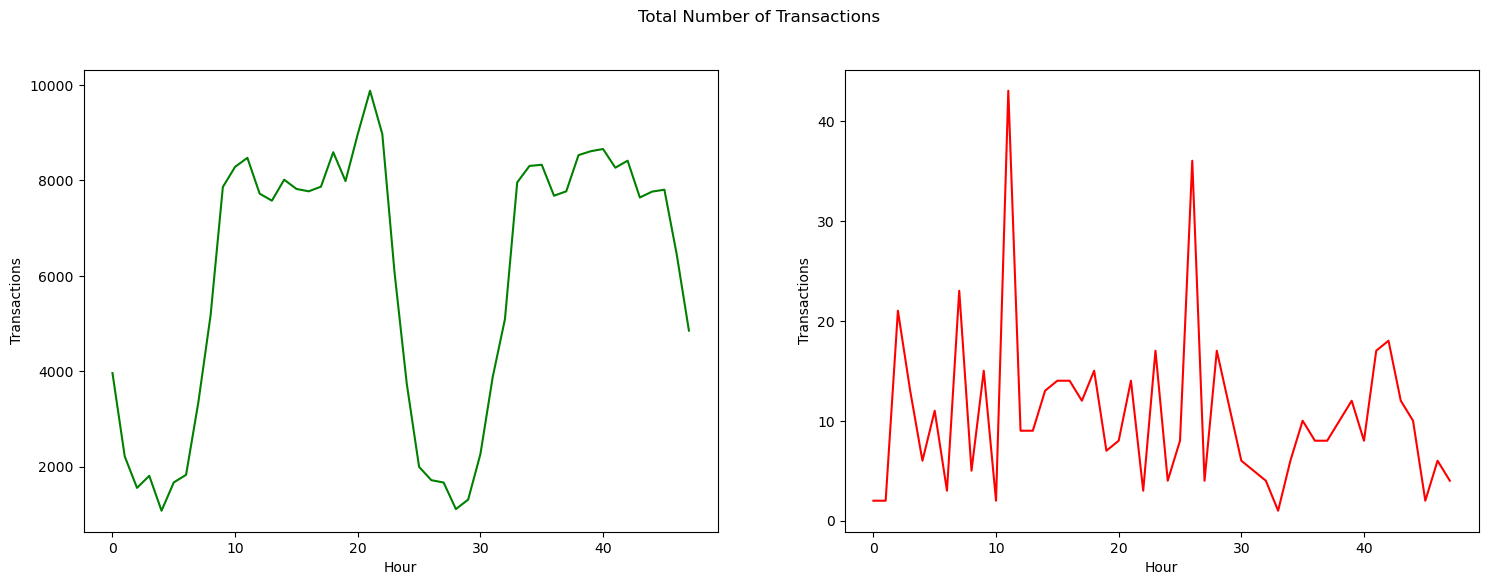

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

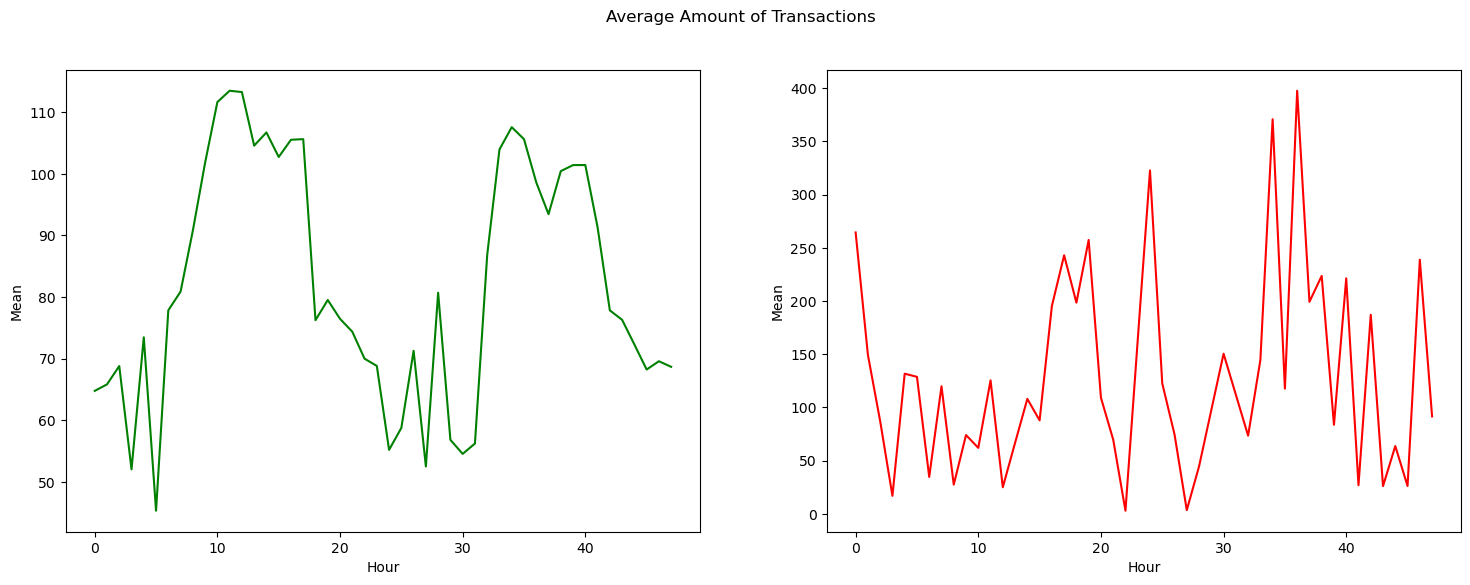

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

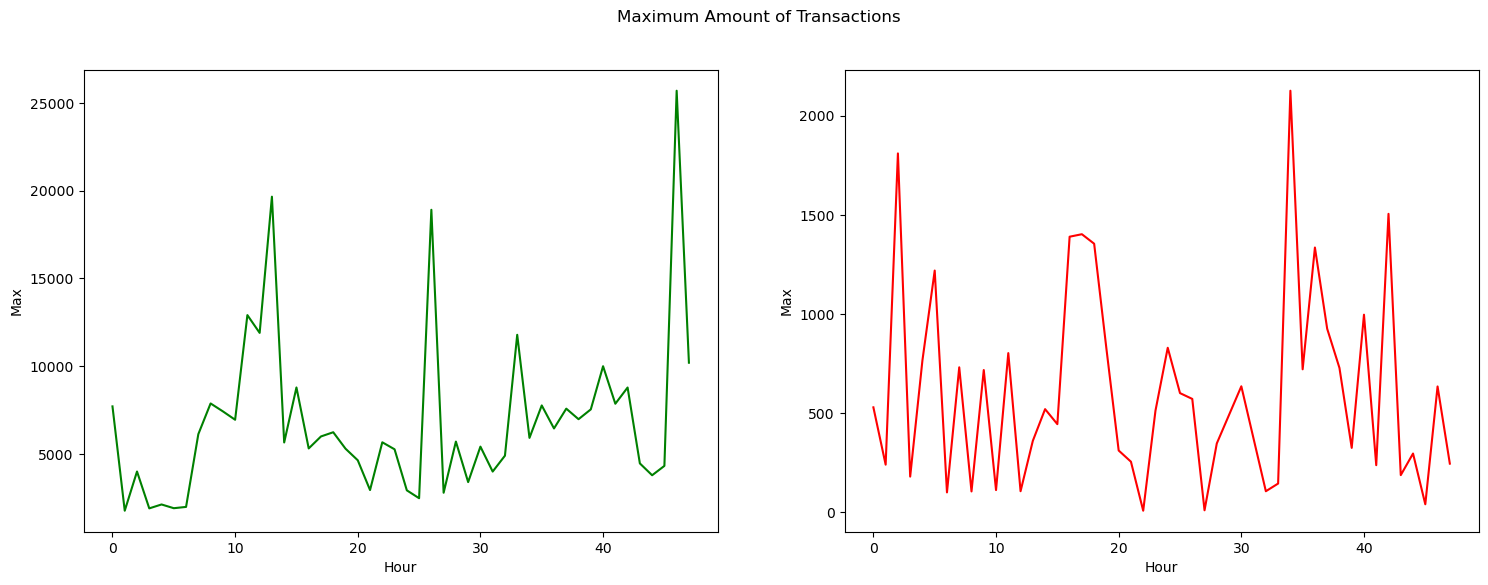

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

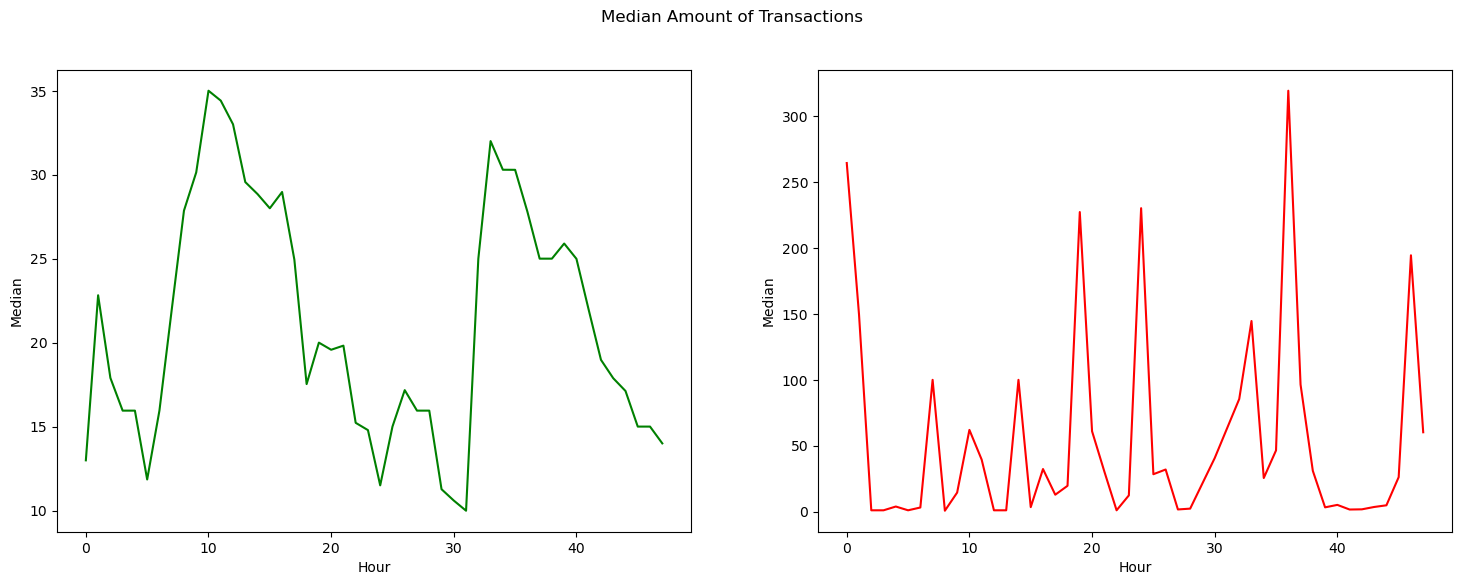

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

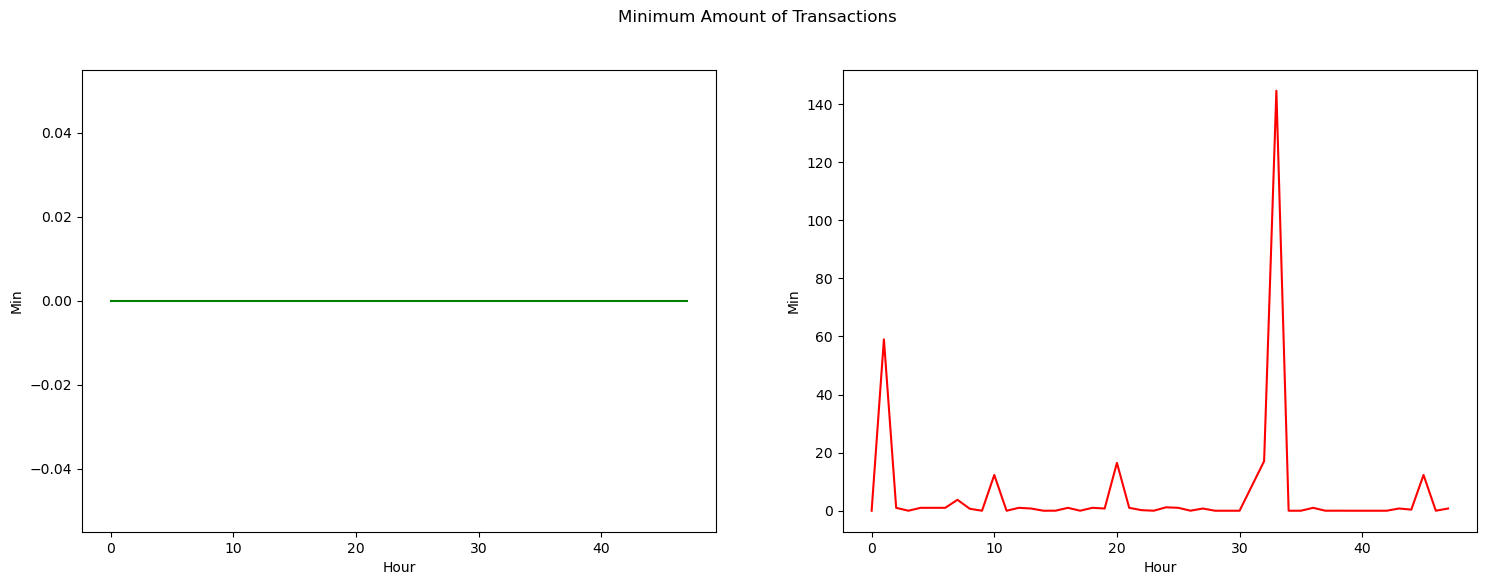

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0], color='green')
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

## Transactions amount

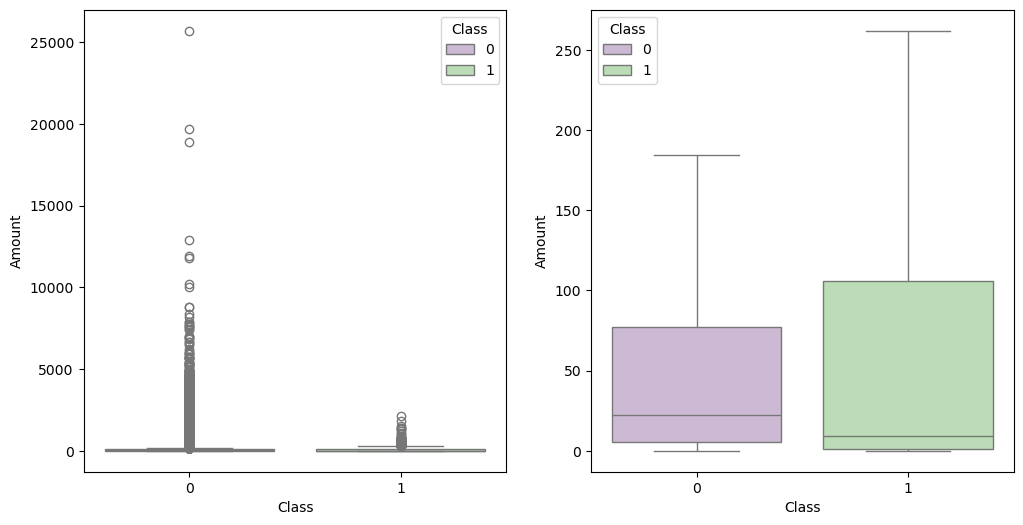

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [14]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']


In [16]:
df_1= pd.DataFrame(class_1.describe())
df_1

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [18]:
df_0=pd.DataFrame(class_0.describe())
df_0

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


When comparing legitimate (Class = 0) and fraudulent (Class = 1) transactions in terms of the transaction amount, we notice distinct differences in their statistical characteristics:

**Legitimate Transactions:**

Tend to have a higher mean amount, indicating that on average, genuine transactions involve more money.

Have a higher first quartile (Q1 or 25%), showing that even the lower-value legitimate transactions are relatively substantial.

Show a lower third (Q3 or 75%) and fourth quartile (maximum) compared to fraudulent transactions, suggesting that most legitimate transactions are within a predictable and bounded range.

Exhibit more extreme outliers, which could be due to high-value purchases that are typical of genuine users.

**Fraudulent Transactions:**

Generally have a lower Q1 and mean, indicating that many fraud attempts involve small transaction amounts — a common tactic to avoid detection.

Surprisingly, the Q4 (maximum values) tend to be higher than those of real transactions, likely reflecting a smaller number of high-value frauds.

Show fewer and less extreme outliers, but a highly skewed distribution, which is typical in fraud datasets where most values cluster at the low end.



## Features correlation

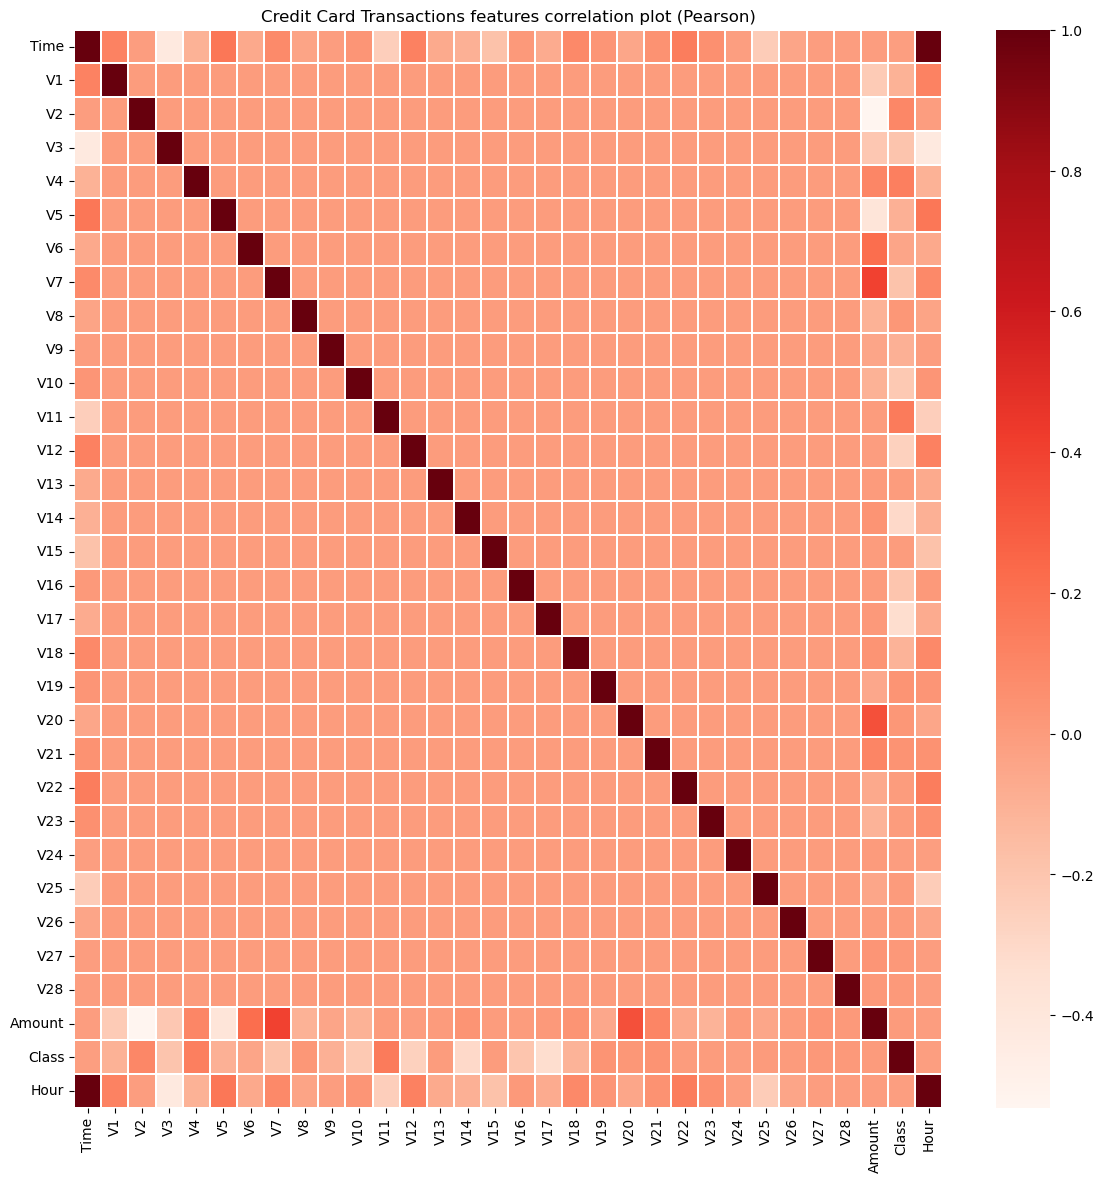

In [21]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As anticipated, there is no significant correlation observed among the features **V1** through **V28** themselves. However, when examining their relationships with other key variables, some interesting patterns emerge. Specifically, a few features show notable correlations with **Time** and **Amount**. For instance, **V3** exhibits an inverse correlation with **Time**, indicating that as the value of **Time** increases, **V3** tends to decrease. On the other hand, certain features such as **V7** and **V20** have a direct, positive correlation with **Amount**, meaning that higher values in these features are generally associated with larger transaction amounts. Conversely, features like **V1** and **V5** demonstrate an inverse correlation with **Amount**, suggesting that as their values rise, the transaction amount tends to be lower.

To better visualize these relationships, we will create a plot focusing initially on the features that show a positive correlation with **Amount**. Specifically, we will graph **V20** and **Amount** together alongside **V7** and **Amount** on the same plot. This combined visualization will help us clearly observe how these features move in tandem with transaction amounts, providing insight into their direct associations and potential predictive value.


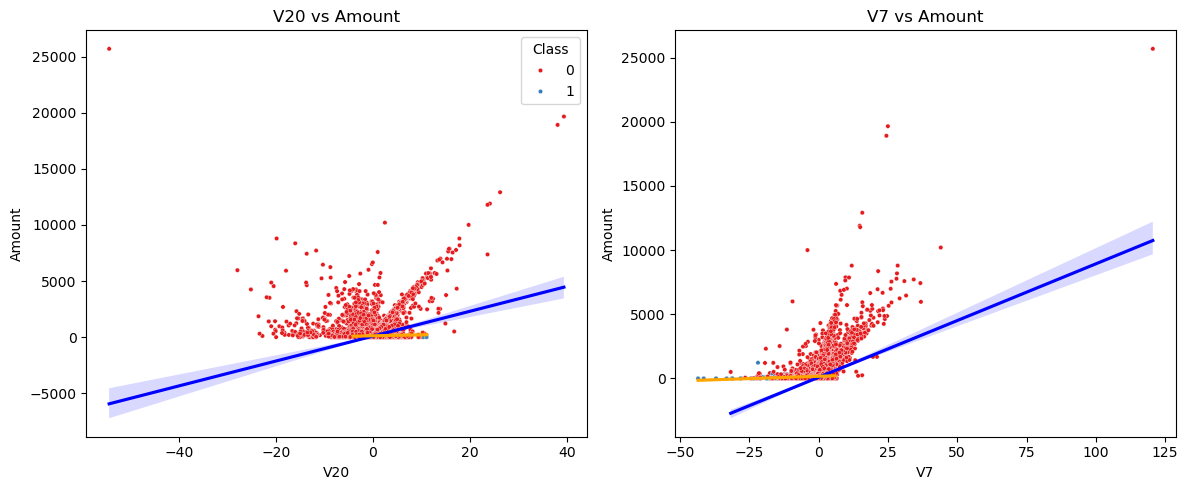

In [18]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot V20 vs Amount
sns.scatterplot(x='V20', y='Amount', data=data_df, hue='Class', ax=axes[0], s=10, palette='Set1', legend='full')
sns.regplot(x='V20', y='Amount', data=data_df[data_df['Class'] == 0], scatter=False, ax=axes[0], color='blue')
sns.regplot(x='V20', y='Amount', data=data_df[data_df['Class'] == 1], scatter=False, ax=axes[0], color='orange')
axes[0].set_title('V20 vs Amount')

# Plot V7 vs Amount
sns.scatterplot(x='V7', y='Amount', data=data_df, hue='Class', ax=axes[1], s=10, palette='Set1', legend=False)
sns.regplot(x='V7', y='Amount', data=data_df[data_df['Class'] == 0], scatter=False, ax=axes[1], color='blue')
sns.regplot(x='V7', y='Amount', data=data_df[data_df['Class'] == 1], scatter=False, ax=axes[1], color='orange')
axes[1].set_title('V7 vs Amount')

plt.tight_layout()
plt.show()




We can clearly observe that both pairs of features—(**V20** with **Amount**) and (**V7** with **Amount**)—demonstrate a positive correlation. This is evidenced by the regression lines plotted for each class: for **Class = 0**, which typically represents the majority or normal transactions, the regression lines exhibit a strong positive slope. This indicates that as the values of **V20** or **V7** increase, the transaction amount tends to increase correspondingly in a consistent manner. For **Class = 1**, which often represents the minority or possibly fraudulent transactions, the regression lines also show a positive slope but with a noticeably smaller gradient. This suggests that although there is still a positive relationship between these features and the transaction amount, the strength of this relationship is weaker for this class compared to the majority class.

Having confirmed these direct positive correlations, we now turn our attention to the features that exhibit an inverse relationship with **Amount**. In other words, these features tend to decrease as the transaction amount increases, or vice versa. Visualizing these inverse correlations through appropriate plots will help us better understand their behavior and potentially uncover patterns relevant to the different classes. Let’s proceed with plotting these inversely correlated feature pairs to deepen our insights into how these features interact with transaction amounts across classes.


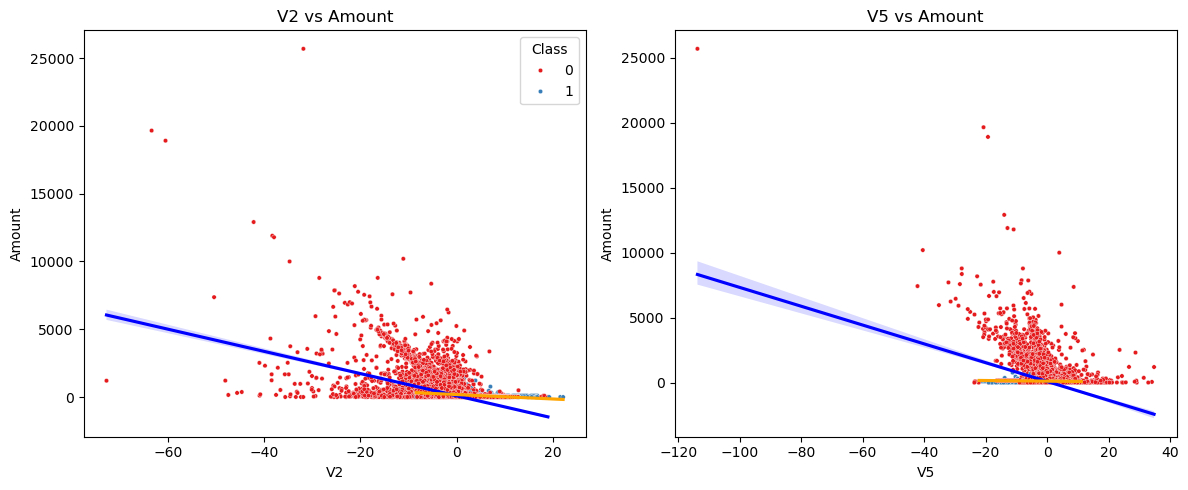

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot V2 vs Amount
sns.scatterplot(x='V2', y='Amount', data=data_df, hue='Class', ax=axes[0], s=10, palette='Set1', legend='full')
sns.regplot(x='V2', y='Amount', data=data_df[data_df['Class'] == 0], scatter=False, ax=axes[0], color='blue', label='Class 0')
sns.regplot(x='V2', y='Amount', data=data_df[data_df['Class'] == 1], scatter=False, ax=axes[0], color='orange', label='Class 1')
axes[0].set_title('V2 vs Amount')

# Plot V5 vs Amount
sns.scatterplot(x='V5', y='Amount', data=data_df, hue='Class', ax=axes[1], s=10, palette='Set1', legend=False)
sns.regplot(x='V5', y='Amount', data=data_df[data_df['Class'] == 0], scatter=False, ax=axes[1], color='blue')
sns.regplot(x='V5', y='Amount', data=data_df[data_df['Class'] == 1], scatter=False, ax=axes[1], color='orange')
axes[1].set_title('V5 vs Amount')

plt.tight_layout()
plt.show()

We can confirm that the two pairs of features exhibit an inverse correlation with Amount. Specifically, the regression lines for Class = 0 show a clear negative slope, indicating that as the values of these features increase, the transaction amount tends to decrease for this class. In contrast, the regression lines for Class = 1 also have a negative slope, but it is much less pronounced—almost flat—suggesting a weaker inverse relationship between these features and the transaction amount in this class. This difference in slope magnitude highlights how the relationship between these features and Amount varies depending on the transaction class.


## Features Density Plot :

A features density plot visualizes the distribution of numerical feature values within a dataset. By plotting the probability density function (PDF) for each feature, this graph helps us understand how data points are spread across the value range, highlighting areas where values are concentrated or sparse.

When density plots are drawn separately for different classes, they provide insights into how the distribution of feature values varies between groups. This can reveal important differences or overlaps between classes, which is particularly useful for identifying discriminative features in classification problems.

Overall, density plots are an effective way to explore the underlying patterns in features, detect skewness or multi-modality, and identify potential outliers or anomalies in the data.

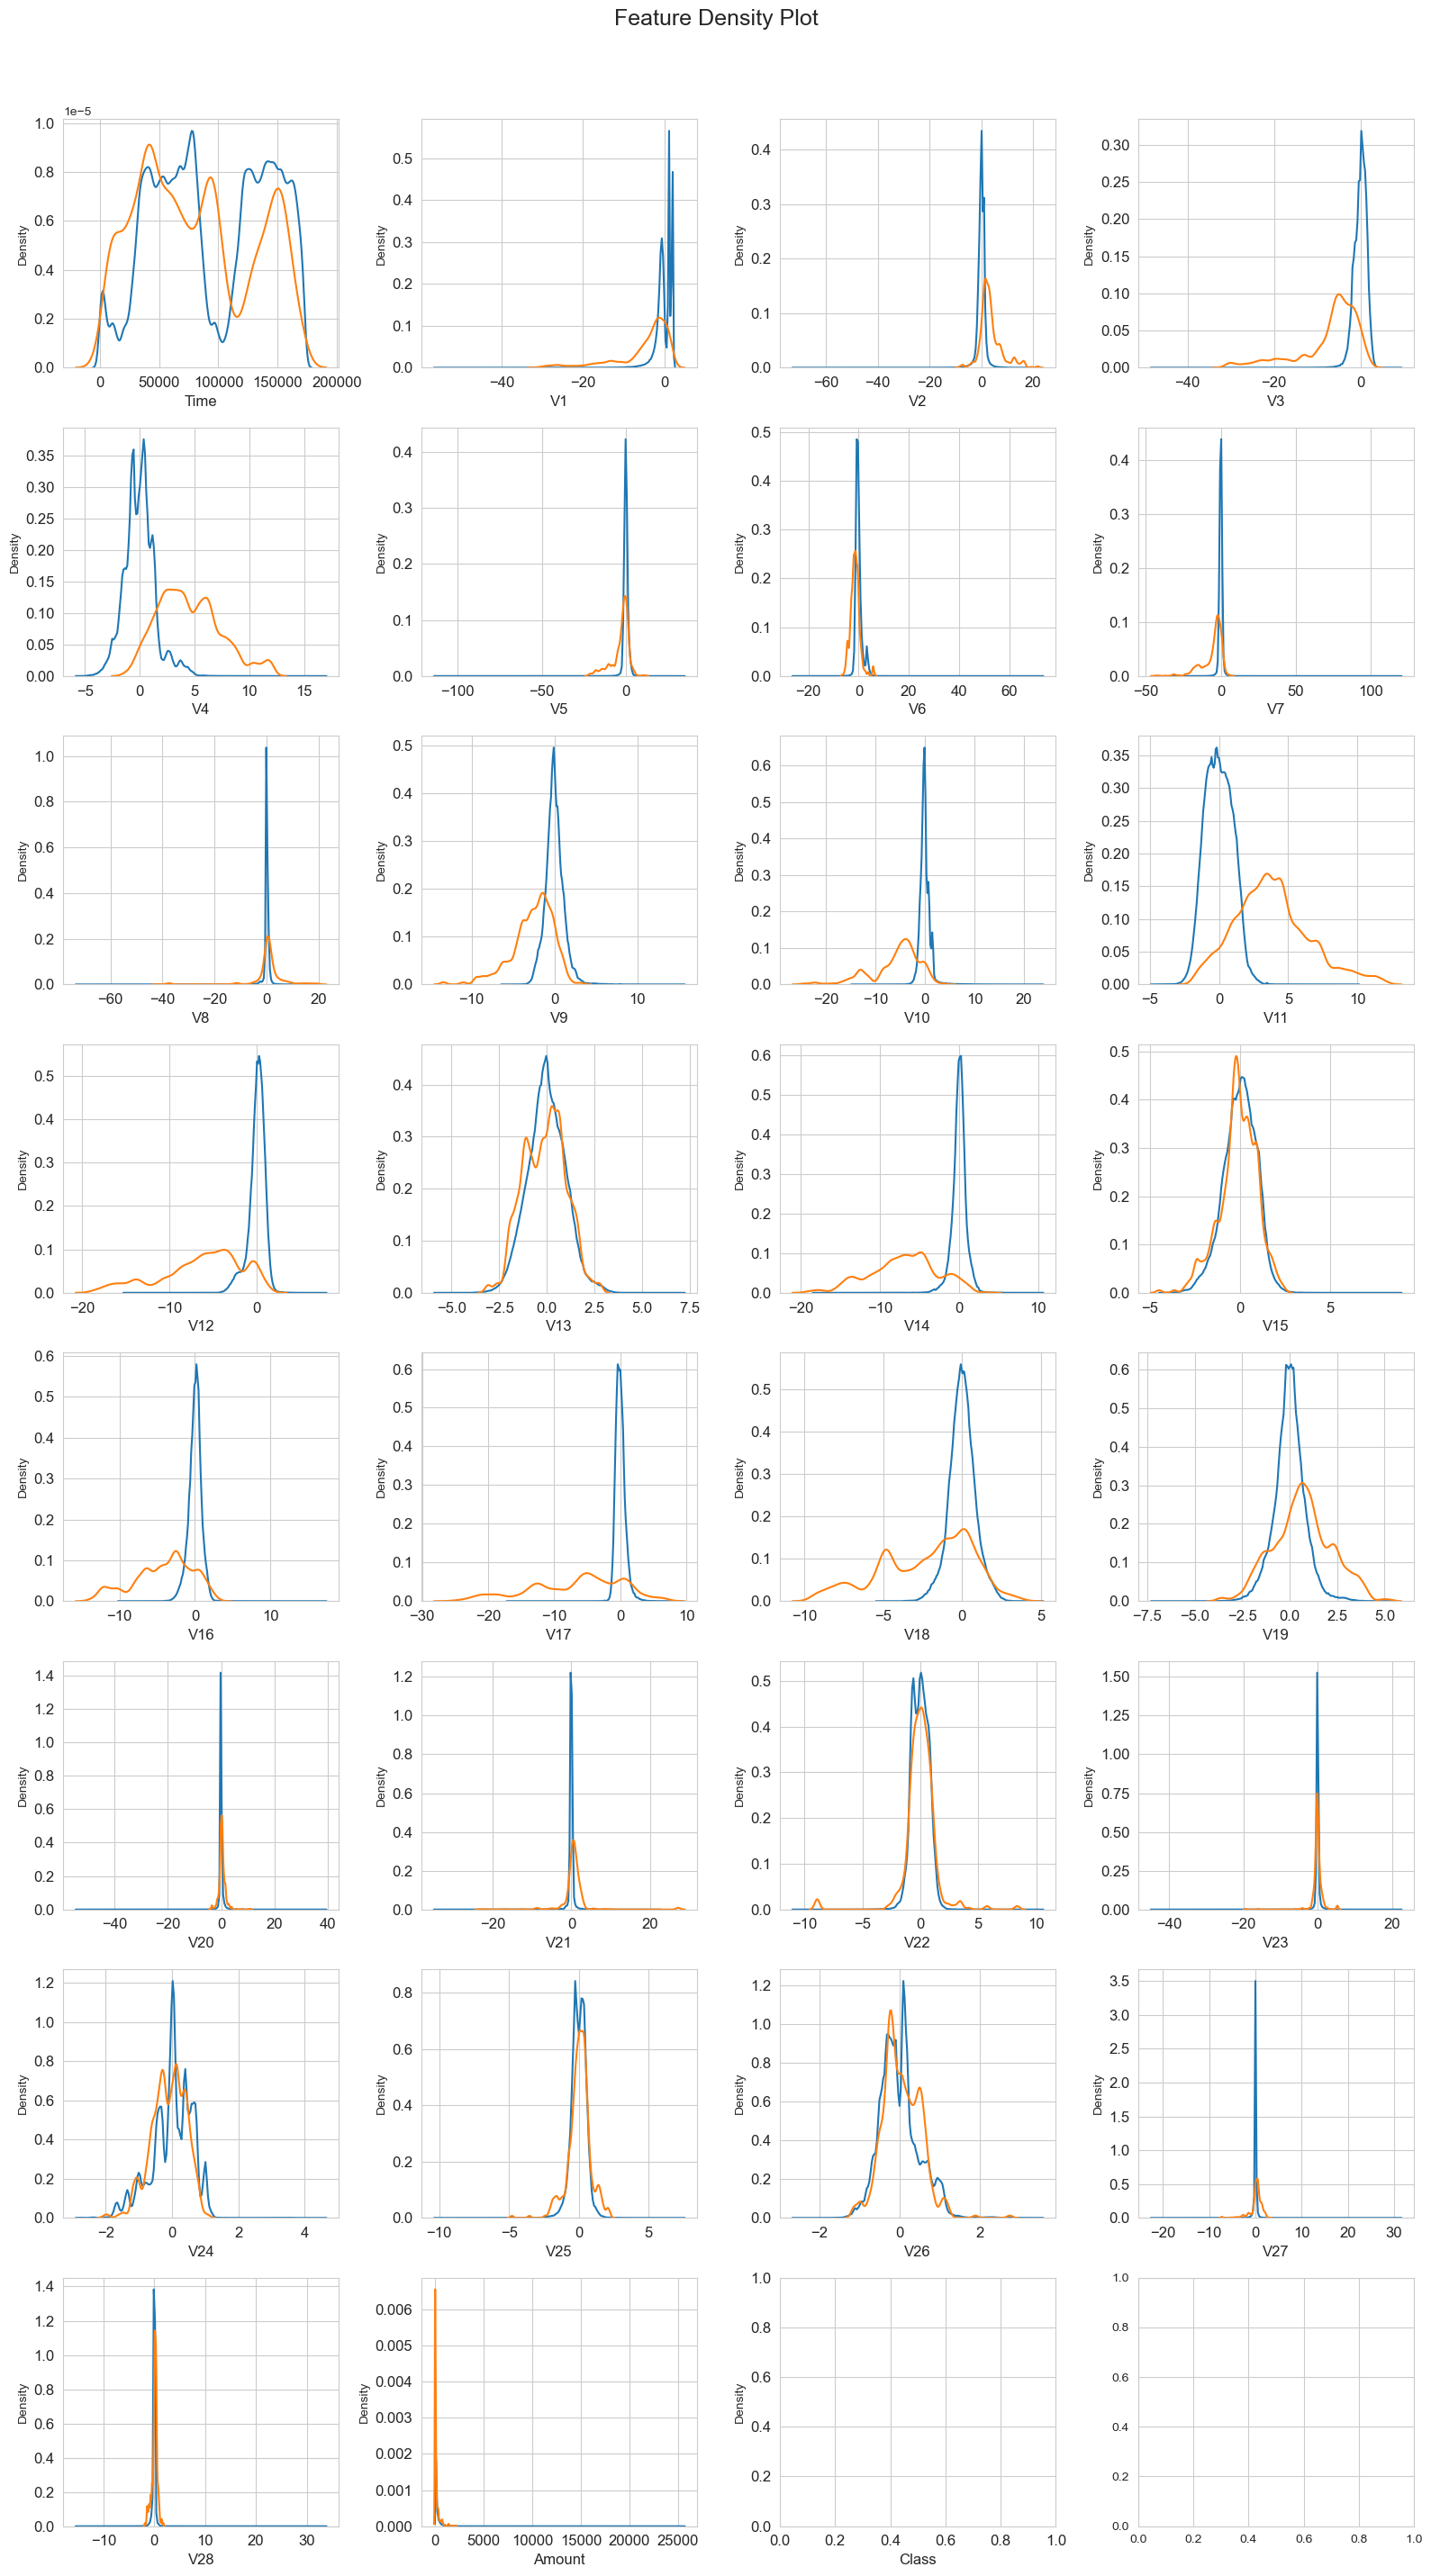

In [20]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

for feature in var:
    i += 1
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

fig.suptitle('Feature Density Plot', fontsize=18, y=1.02)  
plt.tight_layout()
plt.show()




Upon examining the feature density plots, we can observe varying degrees of separation in the distribution of feature values between the two classes represented by **Class = 0** (legitimate transactions) and **Class = 1** (fraudulent transactions). Some features display particularly strong selectivity, meaning their distributions differ markedly depending on the transaction class.

For example, features like **V4** and **V11** show clearly distinct and well-separated distributions for the two classes, making them potentially powerful discriminators in distinguishing between legitimate and fraudulent transactions. Features such as **V12**, **V14**, and **V18** demonstrate partial separation—there is some overlap between the classes, but notable differences in their distribution shapes that could still be leveraged effectively.

Other features, including **V1**, **V2**, **V3**, and **V10**, exhibit quite distinct profiles for each class, suggesting a degree of class-specific behavior in these variables. Conversely, features like **V25**, **V26**, and **V28** have very similar distribution profiles across both classes, indicating limited usefulness for class discrimination.

Looking at the overall pattern across most features, there is a consistent tendency for legitimate transactions (**Class = 0**) to have distributions centered tightly around zero, often with a long tail or skewness toward one end of the value range. This reflects relatively stable or “normal” behavior with occasional extreme values. In contrast, fraudulent transactions (**Class = 1**) tend to exhibit more skewed, asymmetric distributions. This skewness may indicate irregular or anomalous behavior patterns that differentiate fraud from legitimate activity.

Notably, two exceptions to these general trends are the features **Time** and **Amount**, which display different distribution characteristics. These variables often have broader ranges and distinct patterns due to their intrinsic nature—transaction timing and monetary value—which can vary widely irrespective of class.

In summary, the density plots provide valuable insight into which features carry the strongest signals for fraud detection and which may require further transformation or additional feature engineering to improve model performance.




# <a id="6">Predictive models</a>  



### Define predictors and target values

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [23]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [25]:
X=data_df.drop(columns=['Class','Hour'])

In [27]:
y=data_df['Class']

### Split data in train, test and validation set

Let's define train, validation and test sets.

In [29]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=100, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=100, shuffle=True )

##### Training set splitting

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

##### Validation set splitting

In [39]:
X_val_train,X_val_test,y_val_train,y_val_test=train_test_split(X_train,y_train,test_size=0.2,random_state=100)

Let's start with a RandomForrestClassifier model.

## <a id="61">RandomForestClassifier</a>


### Define model parameters

Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use **GINI** as validation criterion , and the formula is **GINI = 2 * (AUC) - 1**, where **AUC** is the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC)**. Number of estimators is set to **110** and number of parallel jobs is set to **4**.

We start by initializing the RandomForestClassifier.

In [43]:
randomforest= RandomForestClassifier(
    n_jobs=4,
    random_state=100,
    criterion='gini',
    n_estimators=110,
    verbose=1
)


Let's train the **RandonForestClassifier** using the **train_df** data and **fit** function.

In [45]:
randomforest.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:  1.4min finished


RandomForestClassifier(n_estimators=110, n_jobs=4, random_state=100, verbose=1)

Saving the trained model using joblib library

In [52]:
joblib.dump(randomforest,'RandomForestModel')

['RandomForestModel']

Let's now predict the **target** values for the **testing** and **validation** data, using **predict** function.

In [54]:
rf_pred = randomforest.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    0.1s finished


In [56]:
rf_val_pred=randomforest.predict(X_val_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed:    0.0s finished


Let's also visualize the features importance.

### Features importance

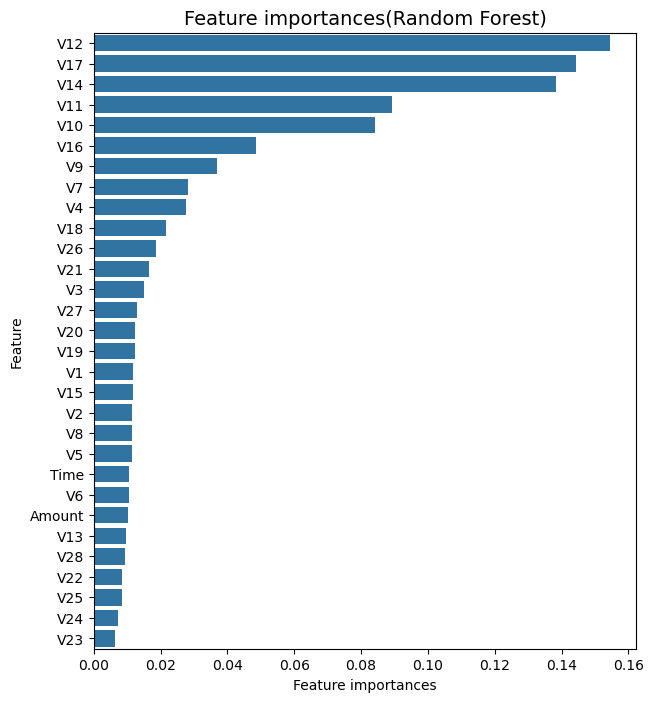

In [60]:
temp = pd.DataFrame({'Feature': predictors, 'Feature importances': randomforest.feature_importances_})
temp = temp.sort_values(by='Feature importances',ascending=False)
plt.figure(figsize = (7,8))
plt.title('Feature importances(Random Forest)',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importances',data=temp)
plt.show()

The most important features are **V12**, **V17**, **V14**, **V11**, **V10**.


### Confusion matrix

Let's show a confusion matrix for the results we obtained.

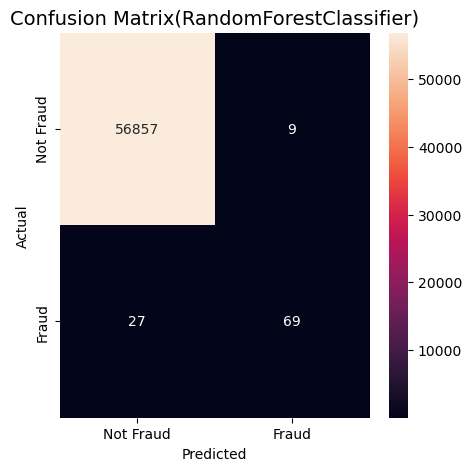

In [63]:
cm = pd.crosstab(y_test,rf_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            fmt ='d' )
plt.title('Confusion Matrix(RandomForestClassifier)', fontsize=14)
plt.show()

### Type I error and Type II error

We need to clarify that confusion matrix is not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need different metrics that accounts in the same time for the **selectivity** and **specificity** of the method we are using, so that we minimize, in the same time, both **Type I errors** and **Type II errors**.


**Null Hypothesis** (**H0**) - The transaction is not a fraud.  
**Alternative Hypothesis** (**H1**) - The transaction is a fraud.  

**Type I error** - You reject the null hypothesis when the null hypothesis is actually true.  
**Type II error** - You fail to reject the null hypothesis when the the alternative hypothesis is true.  

**Cost of Type I error** - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.  
**Cost of Type II error** - You erroneously presume that the transaction is not a fraud and a fraudulent transaction is accepted.  

The following image explains what **Type I error** and **Type II error** are:    



<img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1.jpg" width="600"/>





### Receiver Operating Characteristic(ROC) Curve and Area under curve(AUC)

ROC curve is a graph plotting:

**True Positive Rate (TPR)** on the **y-axis**.

**False Positive Rate (FPR)** on the **x-axis**.

AUC represents the area under the ROC curve.
It quantifies the model’s ability to distinguish between positive and negative classes.

AUC Score Range: 0 to 1

1 = perfect classifier

0.5 = no discrimination (random guessing)

<0.5 = worse than random (poor model)

In short, ROC-AUC measures how well your model separates the two classes across all thresholds.

Let's calculate the ROC-AUC score.

In [78]:
rf_roc_auc_score=roc_auc_score(y_test,rf_pred)
rf_roc_auc_score

0.8592958665986706

The **ROC-AUC** score obtained with **RandomForrestClassifier** is **0.85**.





### Other Model Evaluation Metrics

In [119]:
rf_precision=metrics.precision_score(y_test,rf_pred)
print ('rf_precision:', rf_precision)
print()
rf_recall=metrics.recall_score(y_test,rf_pred)
print('rf_recall: ', rf_recall)
print()
rf_f1_score=metrics.f1_score(y_test,rf_pred)
print('rf_f1_score:',rf_f1_score)
print()
rf_avg_precision=metrics.average_precision_score(y_test,rf_pred)
print('rf_avg_precision:',rf_avg_precision)
print()
print('classification report:')
print(metrics.classification_report(y_test,rf_pred))

rf_precision: 0.8846153846153846

rf_recall:  0.71875

rf_f1_score: 0.7931034482758621

rf_avg_precision: 0.6362913079029745

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.72      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## <a id="62">AdaBoostClassifier</a>


AdaBoostClassifier stands for Adaptive Boosting Classifier.

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [89]:
adaBoost = AdaBoostClassifier(random_state=100,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

### Fit the model

Let's fit the model.

In [91]:
adaBoost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=100)

Saving the model

In [96]:
joblib.dump(adaBoost,'AdaBoostClassifier')

['AdaBoostClassifier']

### Predict the target values

Let's now predict the **target** values for the **testing set** and **validation set**, using predict function.

In [98]:
adaBoost_pred=adaBoost.predict(X_test)
adaBoost_val_pred = adaBoost.predict(X_val_test)

### Features importance

Let's see also the features importance.

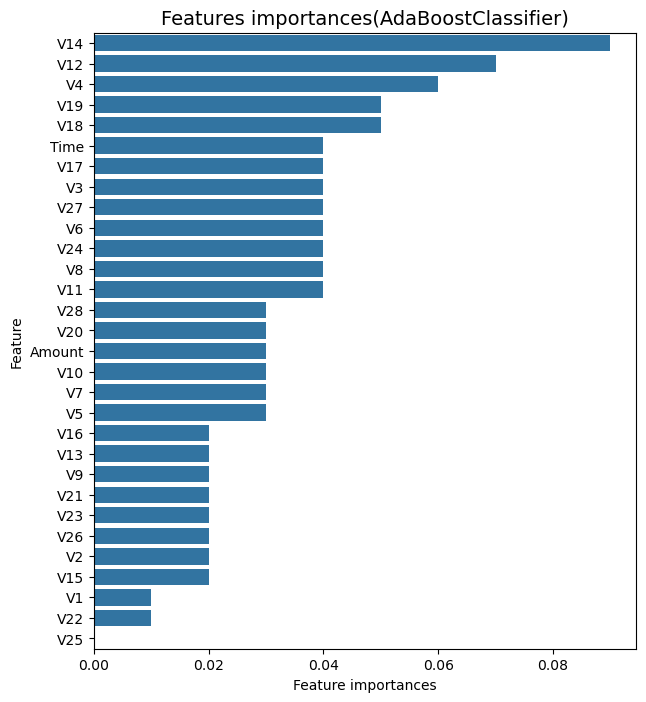

In [101]:
temp1 = pd.DataFrame({'Feature': predictors, 'Feature importances': adaBoost.feature_importances_})
temp1 = temp1.sort_values(by='Feature importances',ascending=False)
plt.figure(figsize = (7,8))
plt.title('Features importances(AdaBoostClassifier)',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importances',data=temp1)
plt.show()

### Confusion matrix

Let's visualize the confusion matrix.

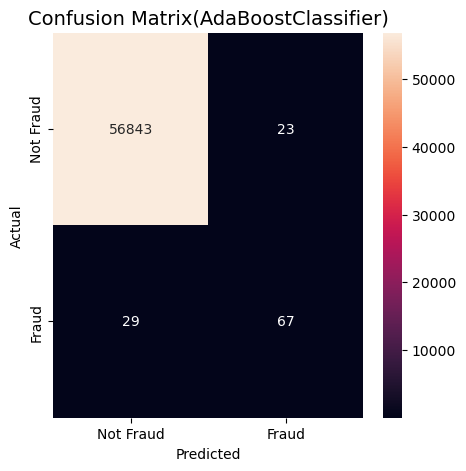

In [104]:
cm2 = pd.crosstab(y_test,adaBoost_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm2,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            fmt = 'd')
plt.title('Confusion Matrix(AdaBoostClassifier)', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


### ROC-AUC Score

In [107]:
adaBoost_roc_auc_score=roc_auc_score(y_test, adaBoost_pred)
adaBoost_roc_auc_score

0.8487561035299358

The ROC-AUC score obtained with AdaBoostClassifier is **0.848**.

### Other Model Evaluation Metrics

In [121]:
adaBoost_precision=metrics.precision_score(y_test,adaBoost_pred)
print ('adaboost_precision :', adaBoost_precision)
print()
adaBoost_recall=metrics.recall_score(y_test,adaBoost_pred)
print('adaboost_recall : ', adaBoost_recall)
print()
adaBoost_f1_score=metrics.f1_score(y_test,adaBoost_pred)
print('adaboost_f1_score:',adaBoost_f1_score)
print()
adaBoost_avg_precision=metrics.average_precision_score(y_test,adaBoost_pred)
print('adaboost_avg_precision:',adaBoost_avg_precision)
print()
print('classification metrics:')
print(metrics.classification_report(y_test,adaBoost_pred))

adaboost_precision : 0.7444444444444445

adaboost_recall :  0.6979166666666666

adaboost_f1_score: 0.7204301075268817

adaboost_avg_precision: 0.5200692965225681

classification metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.70      0.72        96

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



## <a id="63">CatBoostClassifier</a>


CatBoostClassifier is a gradient boosting model based on decision tree algorithm with support for handling categorical data.

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [125]:
cat_boost=CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

Fitting the model using training data

In [127]:
cat_boost.fit(X_train,y_train,verbose=True)

0:	total: 659ms	remaining: 5m 28s
50:	total: 19.9s	remaining: 2m 55s
100:	total: 37.3s	remaining: 2m 27s
150:	total: 56.5s	remaining: 2m 10s
200:	total: 1m 15s	remaining: 1m 52s
250:	total: 1m 34s	remaining: 1m 33s
300:	total: 1m 55s	remaining: 1m 16s
350:	total: 2m 15s	remaining: 57.7s
400:	total: 2m 36s	remaining: 38.5s
450:	total: 2m 55s	remaining: 19.1s
499:	total: 3m 15s	remaining: 0us


Saving the trained model

In [134]:
joblib.dump(cat_boost,'CatBoostClassifier')

['CatBoostClassifier']

### Predict the target values

Let's now predict the **target** values for the **testing set** and **validation set** using predict function.

In [136]:
cat_boost_pred=cat_boost.predict(X_test)
cat_boost_val_pred=cat_boost.predict(X_val_test)

### Features importance

Let's see also the features importance.

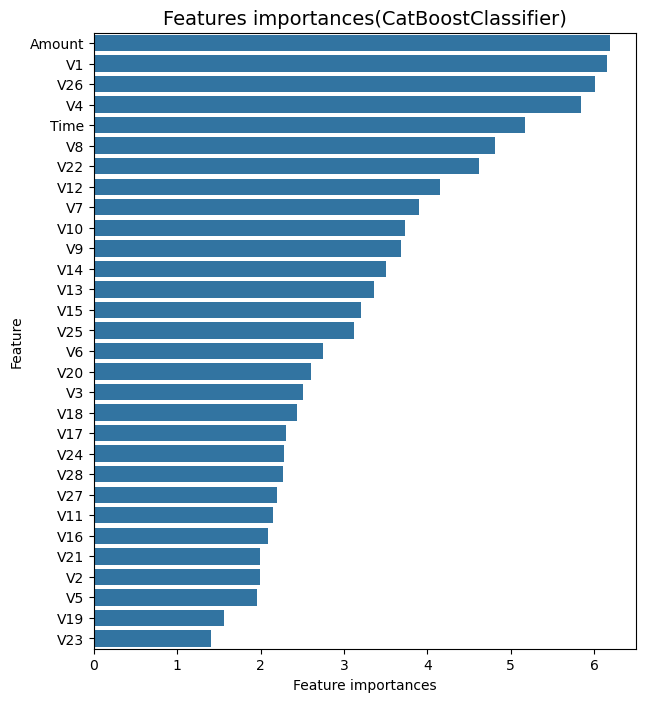

In [131]:
temp2 = pd.DataFrame({'Feature': predictors, 'Feature importances': cat_boost.feature_importances_})
temp2 = temp2.sort_values(by='Feature importances',ascending=False)
plt.figure(figsize = (7,8))
plt.title('Features importances(CatBoostClassifier)',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importances',data=temp2)
plt.show()

### Confusion matrix

Let's visualize the confusion matrix.

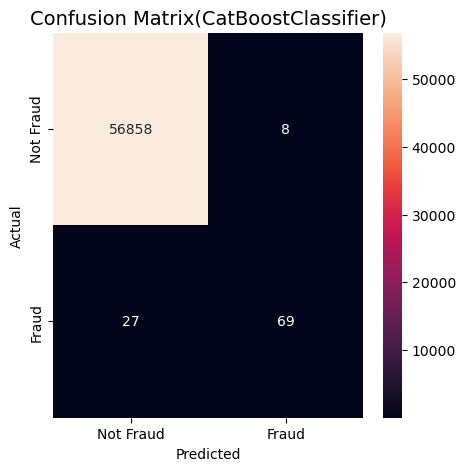

In [138]:
cm3 = pd.crosstab(y_test,cat_boost_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm3,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            fmt ='d')
plt.title('Confusion Matrix(CatBoostClassifier)', fontsize=14)
plt.show()

Let's also calculate the ROC-AUC Score.


### ROC-AUC Score

In [141]:
cat_boost_roc_auc_score=roc_auc_score(y_test, cat_boost_pred)
cat_boost_roc_auc_score

0.8593046591988183

The ROC-AUC score obtained with CatBoostClassifier is **0.859**.

### Other Model Evaluation Metrics 

In [147]:
cat_boost_precision = metrics.precision_score(y_test, cat_boost_pred)
print('cat_boost_precision:', cat_boost_precision)
print()

cat_boost_recall = metrics.recall_score(y_test, cat_boost_pred)
print('cat_boost_recall:', cat_boost_recall)
print()

cat_boost_f1_score = metrics.f1_score(y_test, cat_boost_pred)
print('cat_boost_f1_score:', cat_boost_f1_score)
print()

cat_boost_avg_precision = metrics.average_precision_score(y_test, cat_boost_pred)
print('cat_boost_avg_precision:', cat_boost_avg_precision)
print()
print("classification report:")
print(metrics.classification_report(y_test, cat_boost_pred))

cat_boost_precision: 0.8961038961038961

cat_boost_recall: 0.71875

cat_boost_f1_score: 0.7976878612716763

cat_boost_avg_precision: 0.6445486755353421

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## <a id="63">XGBoost</a>

XGBoost is a gradient boosting algorithm <a href='#8'>[7]</a>.

Let's prepare the model.

### Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [149]:
# Prepare the training and validation datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, train and valid)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

### Train the model

Let's train the model.

In [152]:
       
xgboost = xgb.train(params,
                dtrain,
                500,
                watchlist,
                early_stopping_rounds=50,
                maximize=True,
                verbose_eval=50)

[0]	train-auc:0.91610	valid-auc:0.91194
[50]	train-auc:0.98244	valid-auc:0.97495
[100]	train-auc:0.99198	valid-auc:0.97522
[108]	train-auc:0.99252	valid-auc:0.97649


The best validation score (ROC-AUC) was **0.976**, for round **108**.

Saving the Trained Model

In [158]:
joblib.dump(xgboost,'XGBoostClassifier')

['XGBoostClassifier']

### Feature importances

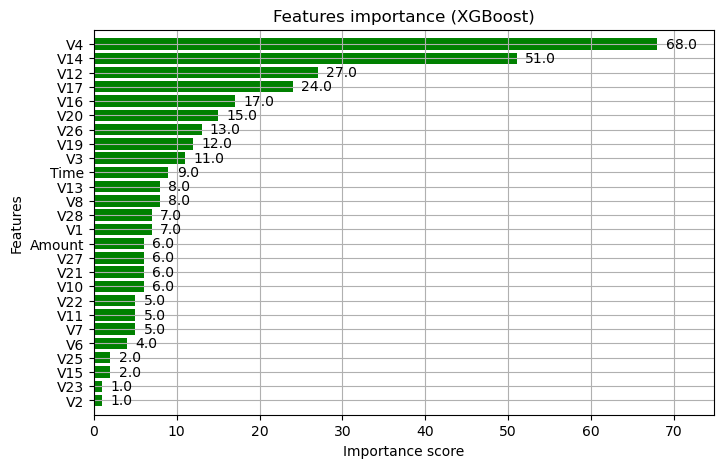

In [160]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(xgboost, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

### Predict test set


We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [163]:
xgboost_pred = xgboost.predict(dtest)

### ROC-AUC Score

Let's calculate ROC-AUC score.

In [166]:
xgb_roc_auc_score=roc_auc_score(y_test, xgboost_pred)
xgb_roc_auc_score

0.9714887117668437

The AUC score for the prediction of fresh data (test set) is **0.971**.

## <a id="64">LightGBM</a>


Let's continue with another gradient boosting algorithm, LightGBM .


### Define model parameters

Let's set the parameters for the model. We will use these parameters only for the first lgb model.

In [170]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }

### Prepare the model

Let's prepare the model, creating the **Datasets**  for the training and validation sets.

In [174]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

### Run the model

Let's run the model, using the **train** function.

In [218]:
lightgbm = lgb.train(
    params,
    dtrain,
    valid_sets=[dtrain, dvalid],
    valid_names=['train', 'valid'],
    num_boost_round=MAX_ROUNDS,
    feval=None
)


In [224]:
lightgbm.best_score['valid']['auc']

0.8870559404217583

Best validation score  was obtained **AUC ~= 0.887**.

Saving the trained model


In [207]:
joblib.dump(lightgbm,'LightGBM')

['LightGBM']

## Feature Importances

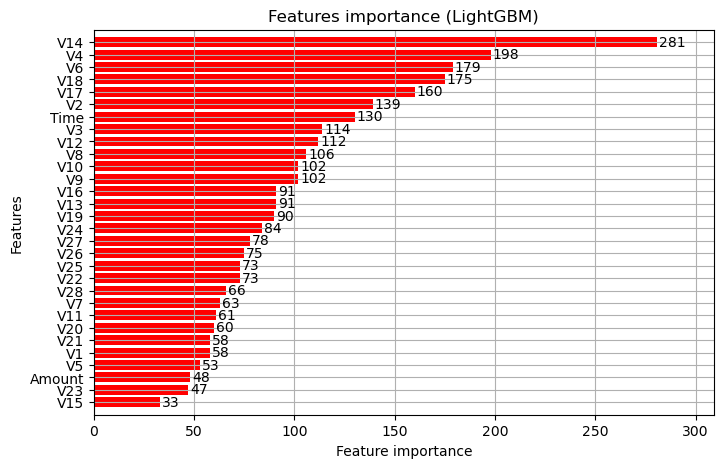

In [227]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(lightgbm, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

Let's predict now the target for the test data.

### Predict test data

In [229]:
lgb_pred = lightgbm.predict(X_test)

### ROC-AUC Score

Let's calculate the ROC-AUC score.

In [243]:
lgb_roc_auc_score=roc_auc_score(y_test, lgb_pred)
lgb_roc_auc_score

0.849453832987491

The ROC-AUC score obtained for the test set is **0.849**.

### Training and validation using cross-validation

Let's now use cross-validation. We will use KFold cross-validation with 5 folds. Data is divided in 5 folds and by rotation, we are training using 4 folds (n-1) and validate using the 5th fold.

Test set is calculated as an average of the predictions.

In [238]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
      

oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])

for train_idx, valid_idx in kf.split(train_df[predictors], train_df[target]):
    train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]

    lightgbm2 = LGBMClassifier(
        nthread=-1,
        n_estimators=2000,
        learning_rate=0.01,
        num_leaves=80,
        colsample_bytree=0.98,
        subsample=0.78,
        reg_alpha=0.04,
        reg_lambda=0.073,
        subsample_for_bin=50,
        boosting_type='gbdt',
        is_unbalance=False,
        min_split_gain=0.025,
        min_child_weight=40,
        min_child_samples=510,
        objective='binary',
        metric='auc',
        silent=True,
        verbose=-1
    )

    lightgbm2.fit(
        train_x, train_y,
        eval_set=[(train_x, train_y), (valid_x, valid_y)],
        eval_metric='auc'
    )

    oof_preds[valid_idx] = lightgbm2.predict_proba(valid_x, num_iteration=lightgbm2.best_iteration_)[:, 1]
    test_preds += lightgbm2.predict_proba(test_df[predictors], num_iteration=lightgbm2.best_iteration_)[:, 1] / kf.n_splits


Lets now calculate the **ROC-AUC Score** for the new model after cross validation

In [245]:
lgb2_roc_auc_score=roc_auc_score(valid_y ,oof_preds[valid_idx])
lgb2_roc_auc_score

0.9704947773501924

The AUC score for the prediction from the test data was 0.97.

We prepare the test prediction, from the averaged predictions for test over the 5 folds.

In [63]:
pred = test_preds


0.849453832987491

### Comparing the models and the scores

In [251]:
model_comparison=pd.DataFrame({'Models':['RandomForestClassifier','AdaBoostClassifier','CatBoostClassifier','XGBoost','LightGBM'],
                  'Roc_Auc_Scores':[rf_roc_auc_score,adaBoost_roc_auc_score,cat_boost_roc_auc_score,xgb_roc_auc_score,lgb2_roc_auc_score]
                 })
model_comparison

,Models,Roc_Auc_Scores
0,RandomForestClassifier,0.859296
1,AdaBoostClassifier,0.848756
2,CatBoostClassifier,0.859305
3,XGBoost,0.971489
4,LightGBM,0.970495


#### visualizing the comparison using bar chart

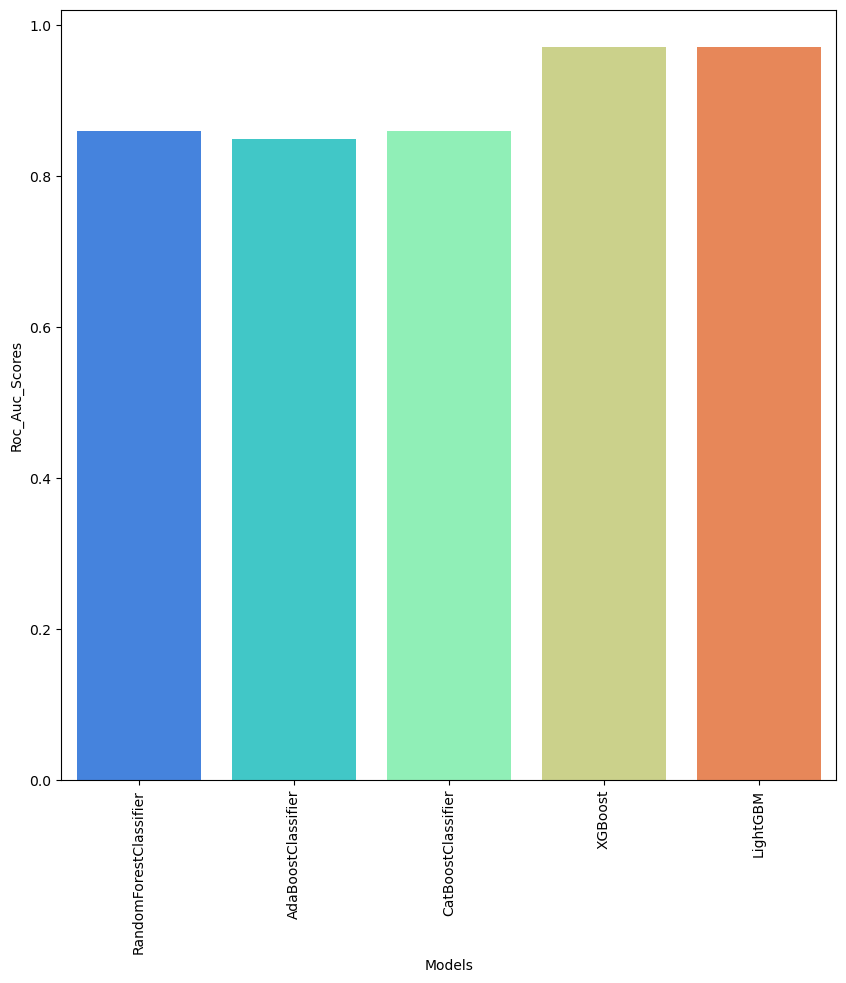

In [258]:
plt.figure(figsize=(10,10))
s = sns.barplot(data=model_comparison,x='Models',y='Roc_Auc_Scores',palette='rainbow')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

SyntaxError: invalid syntax (3277417328.py, line 1)

# <a id="7">Conclusions</a>

We investigated the data, checking for unbalanced data, visualizing the features and understanding the relationship between different features.
We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. 

We started with **RandomForestClassifier**, for which we obtained an AUC scode of **0.85** when predicting the target for the test set.  

We followed with **AdaBoostClassifier** model, with lower AUC score (**0.84**) for the prediction of the test set target values.    

We then followed with **CatBoostClassifier**, with an AUC score after training 500 iterations **0.86**.    

We then experimented with a **XGBoost** model. In this case, we used the validation set for validating the trained model. The best validation score obtained was   **0.976**. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was **0.971**.

We then presented the data to a **LightGBM** model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict the 'Class' values, i.e. detecting if a transaction was fraudulent or not. With the first method we obtained values of AUC for the validation set around **0.887**. For the test set, the score obtained was **0.849**.   
With the cross-validation, we obtained an AUC score for the test prediction of  **0.97**.

# <a id="8">References</a>

[1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud  
[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis  
[3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
[4] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve   
[5] AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html  
[6] CatBoostClassifier, https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/  
[7] XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html  
[8] LightGBM Python implementation, https://github.com/Microsoft/LightGBM/tree/master/python-package  
[9] LightGBM algorithm, https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf   

